## Configuración básica

In [ ]:
import numpy as np
import time
import random
from itertools import combinations
import matplotlib.pyplot as plt
import math

In [ ]:
def leer_matriz(nombre_archivo):
    matriz = []
    with open(nombre_archivo, 'r') as archivo:
      next(archivo)
      for linea in archivo:
          # Elimina los corchetes y divide la cadena en elementos individuales
          elementos = linea.strip()[1:-1].split(' ')
          # Convierte los elementos de cadena a enteros y añádelos a la matriz
          fila = [int(elemento) for elemento in elementos]
          matriz.append(fila)
    return matriz

In [ ]:
nombre_archivo = 'Matriz Goppa4.txt'
matriz = leer_matriz(nombre_archivo)
matriz_original = np.array(matriz)

matriz_original = np.array(matriz)
print(matriz_original)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0

## Archivos para matrices

In [ ]:
nombre_archivo = 'Matriz Goppa.txt'
goppa1 =  np.array(leer_matriz(nombre_archivo)) #9 errores

In [ ]:
nombre_archivo = 'Matriz Goppa2.txt'
goppa2 =  np.array(leer_matriz(nombre_archivo)) #10 errores

In [ ]:
nombre_archivo = 'Matriz Goppa3.txt'
goppa3 =  np.array(leer_matriz(nombre_archivo)) #3 errores

In [ ]:
nombre_archivo = 'Matriz Goppa4.txt'
goppa4 =  np.array(leer_matriz(nombre_archivo)) #3 errores

In [ ]:
nombre_archivo = 'Matriz Goppa5.txt'
goppa5 =  np.array(leer_matriz(nombre_archivo)) #2 errores

## Creaciones de problemas

In [ ]:
class Problem:
  def __init__(self, matrix, messageoriginal, messagecoded, numbererrors, max_evals=10**100, has_inverse = False):
    self.matrix = matrix
    self.nrow = matrix.shape[0]
    self.ncol= matrix.shape[1]
    self.messageoriginal = messageoriginal
    self.messagecoded = messagecoded
    self.numbererrors = numbererrors
    self.best_fitness = None
    self.best_sol = None
    self.max_evals = max_evals
    self.n_evals = 0
    if has_inverse:
      self.inverse = inverse_rectangular_binary(matrix)
    else:
      self.inverse = None
    self.has_inverse = has_inverse

  def hamming_distance_to_coded(self, possiblesolution):
    if self.n_evals >= self.max_evals:
      raise Exception('Max evals reached')
    self.n_evals += 1
    distance = ((possiblesolution @ self.matrix)%2 != self.messagecoded).sum()
    if self.best_fitness == None or distance < self.best_fitness:
      self.best_fitness = distance
      self.best_sol = possiblesolution
      #print(self.best_fitness)
      #print((((self.best_sol@ self.matrix)%2)!= self.messagecoded).sum())
    return distance

  def create_new_try_clone(self):
    New_problem = Problem(self.matrix, self.messageoriginal, self.messagecoded, self.numbererrors, self.max_evals,False)
    if self.has_inverse:
      New_problem.has_inverse = True
      New_problem.inverse = self.inverse
    return New_problem


def generate_non_singular_binary_matrix2(size):
    # Generate a random square matrix of the specified size with elements 0 or 1
    matrix = np.random.randint(2, size=(size, size))
    # Ensure the matrix is non-singular by making sure its determinant is non-zero
    while (np.linalg.det(matrix)) % 2 <= 10**-3 or (np.linalg.det(matrix)) % 2 >= 2-10**-3:
        matrix = np.random.randint(2, size=(size, size))
    return matrix

def generate_non_singular_binary_matrix(size):
    # Generate a random square matrix of the specified size with elements 0 or 1
    matrix = np.random.randint(2, size=(size, size))
    #matrix = np.zeros((size, size))
    # Ensure the matrix is non-singular by making sure its determinant is non-zero
    while (np.linalg.det(matrix)) % 2 <= 10**-3 or (np.linalg.det(matrix)) % 2 >= 2-10**-3:
      matrix = np.zeros((size, size))
      for i in range(size):
        randvector = np.zeros(size)
        randvector[i:] = np.random.randint(2,size=(size-i))
        randvector[i] = 1
        matrix[i,:] = randvector
      for i in range(1,size):
        matrix[i,:] = (matrix[i,:]+matrix[0,:])%2
      matrix = (matrix @ matrix)%2
    return matrix

def binary_random_vector_with_ones(hammingweight, size):
    # Create a vector with n ones and size-n zeros
    vector = np.concatenate((np.ones(hammingweight), np.zeros(size - hammingweight)))
    # Shuffle the vector to randomize the positions of the ones
    np.random.shuffle(vector)
    return vector

def Createproblem(goppamatrix = matriz_original,numbererrors = 4,max_evals = 10**100, inverse = False):
  nrow = goppamatrix.shape[0]
  ncol= goppamatrix.shape[1]
  P = np.random.permutation(np.eye(ncol))
  S = generate_non_singular_binary_matrix(nrow)
  C = (((S @ goppamatrix)%2) @ P) %2
  originalmessage = np.random.randint(2, size=(nrow))
  codedmessage_without_errors = (originalmessage @ C) %2
  codedmessage = (codedmessage_without_errors + binary_random_vector_with_ones(numbererrors,ncol)) % 2
  #print(np.linalg.det(P))
  #print(np.linalg.det(S))
  #print(np.linalg.det(C[:,:C.shape[0]]))
  return Problem(C,originalmessage,codedmessage,numbererrors,max_evals,inverse)



In [ ]:
P1 = Createproblem(goppamatrix = goppa3,numbererrors = 3,inverse=False)
#P1.matrix

In [ ]:
#A1 = SearchingAllPossibleSolutionsDirect()
#A1.solve(P1)

NameError: name 'SearchingAllPossibleSolutionsDirect' is not defined

In [ ]:
P1.messagecoded

In [ ]:
P1.messageoriginal

## Calcular inversa

In [ ]:
# Operaciones en binario
def binary_addition(a, b):
    return (a + b) % 2

def binary_subtraction(a, b):
    return (a - b) % 2

def binary_multiplication(a, b):
    return a & b


def find_submatrix_with_rank(matrix, rank):
  if rank == 1:
    return [0],[0]
  else:
    m,n = matrix.shape
    importantrows,importantcolumns = find_submatrix_with_rank(matrix, rank-1)
    for i in range(n):
      for x in range(m):
        if i not in importantcolumns and x not in importantrows:
          indicescol = importantcolumns + [i]
          indicesrow = importantrows + [x]
          reducedmatrix = matrix[np.ix_(indicesrow,indicescol)]
          #print(indices)
          determinant = calculate_binary_determinant(reducedmatrix)
          if determinant > 10**10 or (determinant %2 >= 10**-3 and determinant %2 <= 2-10**-3):
            return indicesrow,indicescol
  return importantrows,importantcolumns
  raise Exception('Solución de mierda')


def calculate_binary_determinant(matriz):
    triangular = turn_into_triangular_matrix(matriz)
    #print(triangular)
    det = 1
    for i in range(triangular.shape[0]):
      det = (det *triangular[i,i])%2
    return det

def turn_into_triangular_matrix(matrix):
    # Hacer una copia de la matriz para no modificar la original
    m = matrix.shape[0]
    n = matrix.shape[1]
    #M = np.hstack((matrix,np.eye(matrix.shape[0])))
    n_empty_columns = 0
    M = np.copy(matrix)
    #print(M)

    # Convertir la matriz a triangular superior
    for i in range(m):
      #print(M)
      # Si el elemento diagonal es 0, buscar una fila debajo con un 1 y hacer swap
      if M[i, i] == 0:
          #print("yeah")
          #print(M)
          for j in range(i + 1, m):
              if M[j, i] == 1:
                  M[[i, j]] = M[[j, i]]  # Swap de filas
                  break

        # Si el elemento diagonal sigue siendo 0, continuar con la siguiente columna
      if M[i, i] == 0:
        #n_empty_columns += 1
        continue

      # Eliminar los 1's debajo del elemento diagonal
      for j in range(i + 1, m):
            if M[j, i] == 1:
                M[j] = binary_subtraction(M[j], M[i])
    return M

def next_combination(comb, n):
    i = len(comb) - 1
    while i >= 0 and comb[i] == n - len(comb) + i:
        i -= 1
    if i >= 0:
        comb[i] += 1
        for j in range(i + 1, len(comb)):
            comb[j] = comb[j - 1] + 1

def generar_combinacion(n, m, indice,comb = None):
  sum = 0
  if comb == None and m > 0:
    n_starting_zeros = 0
    for i in range(1,n-m+2):
      n_comb = math.comb(n-i,m-1)
      if indice < sum + n_comb:
        n_starting_zeros = i-1
        break
      sum += n_comb
    comb = list(range(n_starting_zeros,m+n_starting_zeros))
    for _ in range(sum,indice-1):
      next_combination(comb, n)
  if indice-sum > 0:
    next_combination(comb, n)
  vector = [0] * n
  for i in comb:
    vector[i] = 1
  return [np.array(vector),comb]


# Eliminación gaussiana en binario
def inverse_rectangular_binary(matrix):
  #Only for m x n when n > m
    m, n = matrix.shape
    min_size = min(m,n)
    #Basura de solución
    #for indices in combinations(range(n), m):
    #founded = False
    #for indices in combinations(range(m+2), m):
    """
    for i in range(2**m-1,2 ** n):
      if bin(i).count('1') == m:
        #vector = np.array(bin(i)[2:].zfill(n))
        vector = [int(x) for x in bin(i)[2:].zfill(n)]
        indices = []
        for i in range(len(vector)):
          if vector[len(vector)-i-1] == 1:
            indices.append(i)
        reducedmatrix = matrix[:,indices]
        if (np.linalg.det(reducedmatrix)) % 2 >= 10**-3 and (np.linalg.det(reducedmatrix)) % 2 <= 2-10**-3:
          #print(reducedmatrix)
          actualindices = indices
          founded = True
          break
    """
    _,actualindices = find_submatrix_with_rank(matrix,m)
    if len(actualindices)< m:
      print("Nope, no funsiona, tamaño ",m," y ",n)
      print(matrix)
    comb = None
    i = 0
    while len(actualindices)< m:
      if i > 2**n:
        raise Exception('Bucle infinito Yeah')
      indices,comb = generar_combinacion(n, m, i,comb)
      i += 1
      det = calculate_binary_determinant(matrix[:,comb])
      if det != 0:
        actualindices = comb

    reducedmatrix = matrix[:,actualindices]
    #if not founded:
      #raise Exception('Solución de mierda')
    squareinverse = inverse_square_binary(reducedmatrix)
    inverse = np.zeros((n,m))
    inverse[actualindices,:] = squareinverse
    return inverse.astype(int)

def inverse_square_binary(matrix):
    # Hacer una copia de la matriz para no modificar la original
    m = matrix.shape[0]
    n = matrix.shape[1]
    M = np.hstack((matrix,np.eye(matrix.shape[0])))
    n_empty_columns = 0

    # Convertir la matriz a triangular superior
    for i in range(m):
      # Si el elemento diagonal es 0, buscar una fila debajo con un 1 y hacer swap
      if M[i-n_empty_columns, i] == 0:
          for j in range(i + 1-n_empty_columns, m):
              if M[j-n_empty_columns, i] == 1:
                  M[[i, j-n_empty_columns]] = M[[j-n_empty_columns, i]]  # Swap de filas
                  break

        # Si el elemento diagonal sigue siendo 0, continuar con la siguiente columna
      if M[i, i] == 0:
        n_empty_columns += 1
        continue

      # Eliminar los 1's debajo del elemento diagonal
      for j in range(i + 1-n_empty_columns, m):
          if M[j, i] == 1:
              M[j] = binary_subtraction(M[j], M[i-n_empty_columns])

    # Eliminar los 1's encima del elemento diagonal
    for j in range(m-1,-1,-1):
      for i in range(j+1,n):
        if M[j, i] == 1:

          M[j] = binary_subtraction(M[j], M[i])
    #print(M)
    return M[:,m:].astype(int)

# Definir la matriz binaria
matrixnonsquare = np.array([[1,1,0,1,0,1],[1,1,1,1,0,0],[1,0,1,0,1,0]])
matrix = np.array([[1,1,0],
                   [0,1,1],
                   [0,0,1]])

m, n = matrix.shape
max_size = max(m,n)
extended_matrix = np.zeros((max_size, max_size), dtype=int)
np.fill_diagonal(extended_matrix, 1)
extended_matrix[:m, :n] = matrix


# Aplicar eliminación gaussiana
inverse_matrix = inverse_square_binary(matrix)

print("Original binary matrix:")
print(matrix)
print("Extended binary matrix:")
print(extended_matrix)
print("Inverse of the binary matrix:")
print(inverse_matrix)
print("Result:")
print((matrix @ inverse_matrix)%2)

print("\n")
print(matrixnonsquare)
print("\n")
print(inverse_rectangular_binary(matrixnonsquare))
print("\n")
print((matrixnonsquare @ inverse_rectangular_binary(matrixnonsquare))%2)

n = 5  # Longitud del vector
m = 3  # Número de unos en el vector
indice = 1  # Índice de la combinación deseada

for indice in range(0,10):
  combinacion,comb = generar_combinacion(n, m, indice)
  print("Combinación en el índice", indice, ":")
  print(comb)

Original binary matrix:
[[1 1 0]
 [0 1 1]
 [0 0 1]]
Extended binary matrix:
[[1 1 0]
 [0 1 1]
 [0 0 1]]
Inverse of the binary matrix:
[[1 1 1]
 [0 1 1]
 [0 0 1]]
Result:
[[1 0 0]
 [0 1 0]
 [0 0 1]]


[[1 1 0 1 0 1]
 [1 1 1 1 0 0]
 [1 0 1 0 1 0]]


[[1 1 1]
 [0 1 1]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]


[[1 0 0]
 [0 1 0]
 [0 0 1]]
Combinación en el índice 0 :
[0, 1, 2]
Combinación en el índice 1 :
[0, 1, 3]
Combinación en el índice 2 :
[0, 1, 4]
Combinación en el índice 3 :
[0, 2, 3]
Combinación en el índice 4 :
[0, 2, 4]
Combinación en el índice 5 :
[0, 3, 4]
Combinación en el índice 6 :
[1, 2, 3]
Combinación en el índice 7 :
[1, 2, 4]
Combinación en el índice 8 :
[1, 3, 4]
Combinación en el índice 9 :
[2, 3, 4]


In [ ]:
matrixnonsquare[:,[0,2,5]]

array([[1, 0, 1],
       [1, 1, 0],
       [1, 1, 0]])

In [ ]:
calculate_binary_determinant(matrixnonsquare[:,[0,2,5]])

0

In [ ]:

# Ejemplo de uso:
matriz_ejemplo = np.array([[1, 0, 1],
                  [1, 1, 0],
                  [0, 1, 0]])

determinante = calculate_binary_determinant(matriz_ejemplo)
print(matriz_ejemplo)
print("El determinante de la matriz es:", determinante)

[[1 0 1]
 [1 1 0]
 [0 1 0]]
El determinante de la matriz es: 1


In [ ]:
"""
P1 = Createproblem(goppa1,10,10000,False)
P1_inverse = inverse_rectangular_binary(P1.matrix)
print(P1_inverse)


calculate_binary_determinant(P1_inverse[range(181),:])

math.comb(10,4)

def generar_combinacion(n, m, indice,comb = None):
  if comb == None:
    sum = 0
    comb = []
    n_starting_zeros = 0
    for x in range(1,m):
      #
      for i in range(1,n-m+2):
        n_comb = math.comb(n-i-n_starting_zeros,m-x)
        if indice+1 < sum + n_comb:
          n_starting_zeros += i-1
          break
        sum += n_comb
      comb.append(n_starting_zeros)
      n_starting_zeros += 1
    comb.append(n_starting_zeros)
    print(sum)
    #comb = list(range(n_starting_zeros,m+n_starting_zeros))
    for _ in range(sum,indice-1):
      next_combination(comb, n)
  if indice-sum > 0:
    next_combination(comb, n)
  vector = [0] * n
  for i in comb:
    vector[i] = 1
  return [np.array(vector),comb]

n = 5  # Longitud del vector
m = 3  # Número de unos en el vector
indice = 1  # Índice de la combinación deseada

# Obtener la combinación correspondiente al índice dado
comb = None
for indice in range(0,10):
  combinacion,comb = generar_combinacion(n, m, indice)
  print("Combinación en el índice", indice, ":")
  print(comb)

"""

'\nP1 = Createproblem(goppa1,10,10000,False)\nP1_inverse = inverse_rectangular_binary(P1.matrix)\nprint(P1_inverse)\n\n\ncalculate_binary_determinant(P1_inverse[range(181),:])\n\nmath.comb(10,4)\n\ndef generar_combinacion(n, m, indice,comb = None):\n  if comb == None:\n    sum = 0\n    comb = []\n    n_starting_zeros = 0\n    for x in range(1,m):\n      #\n      for i in range(1,n-m+2):\n        n_comb = math.comb(n-i-n_starting_zeros,m-x)\n        if indice+1 < sum + n_comb:\n          n_starting_zeros += i-1\n          break\n        sum += n_comb\n      comb.append(n_starting_zeros)\n      n_starting_zeros += 1\n    comb.append(n_starting_zeros)\n    print(sum)\n    #comb = list(range(n_starting_zeros,m+n_starting_zeros))\n    for _ in range(sum,indice-1):\n      next_combination(comb, n)\n  if indice-sum > 0:\n    next_combination(comb, n)\n  vector = [0] * n\n  for i in comb:\n    vector[i] = 1\n  return [np.array(vector),comb]\n\nn = 5  # Longitud del vector\nm = 3  # Número de u

In [ ]:
"""
def generar_combinacion(n, m, indice,comb = None):
  sum = 0
  if comb == None and m > 0:
    n_starting_zeros = 0
    for i in range(1,n-m+2):
      n_comb = math.comb(n-i,m-1)
      if indice < sum + n_comb:
        n_starting_zeros = i-1
        break
      sum += n_comb
    comb = list(range(n_starting_zeros,m+n_starting_zeros))
    for _ in range(sum,indice-1):
      next_combination(comb, n)
  if indice-sum > 0:
    next_combination(comb, n)
  vector = [0] * n
  for i in comb:
    vector[i] = 1
  return [np.array(vector),comb]

n = 10  # Longitud del vector
m = 3  # Número de unos en el vector
indice = 1  # Índice de la combinación deseada

# Obtener la combinación correspondiente al índice dado
comb = None
for indice in range(0,20):
  combinacion,comb = generar_combinacion(n, m, indice)
  print("Combinación en el índice", indice, ":")
  print(comb)

"""

'\ndef generar_combinacion(n, m, indice,comb = None):\n  sum = 0\n  if comb == None and m > 0:\n    n_starting_zeros = 0\n    for i in range(1,n-m+2):\n      n_comb = math.comb(n-i,m-1)\n      if indice < sum + n_comb:\n        n_starting_zeros = i-1\n        break\n      sum += n_comb\n    comb = list(range(n_starting_zeros,m+n_starting_zeros))\n    for _ in range(sum,indice-1):\n      next_combination(comb, n)\n  if indice-sum > 0:\n    next_combination(comb, n)\n  vector = [0] * n\n  for i in comb:\n    vector[i] = 1\n  return [np.array(vector),comb]\n\nn = 10  # Longitud del vector\nm = 3  # Número de unos en el vector\nindice = 1  # Índice de la combinación deseada\n\n# Obtener la combinación correspondiente al índice dado\ncomb = None\nfor indice in range(0,20):\n  combinacion,comb = generar_combinacion(n, m, indice)\n  print("Combinación en el índice", indice, ":")\n  print(comb)\n\n'

## Algoritmos

In [ ]:
class RandomSearchWithInverse:
  def __init__(self):
    self.name = "Random search with the inverse algorithm"

  def solve(self, problem):
    matrix = problem.matrix
    if problem.has_inverse:
      inverse_matrix = problem.inverse
    else:
      inverse_matrix = inverse_rectangular_binary(matrix)
    notsolve = True
    while notsolve and problem.max_evals > problem.n_evals:
      randomcodedsolution = (problem.messagecoded + binary_random_vector_with_ones(problem.numbererrors,problem.ncol))%2
      randomsolution = (randomcodedsolution @ inverse_matrix)%2
      #if (randomsolution == problem.messageoriginal).all():
      if problem.hamming_distance_to_coded(randomsolution) <= problem.numbererrors:
        notsolve = False

In [ ]:
class RandomSearchDirect:
  def __init__(self):
    self.name = "Random direct search algorithm"

  def solve(self, problem):
    matrix = problem.matrix
    notsolve = True
    while notsolve and problem.max_evals > problem.n_evals:
      posiblesolution = np.random.randint(2, size=(problem.nrow))
      if problem.hamming_distance_to_coded(posiblesolution) <= problem.numbererrors:
        notsolve = False

In [ ]:
class SearchingAllPossibleSolutionsWithInverse:
  def __init__(self):
    pass

  def solve(self, problem):
    solutions = []
    matrix = problem.matrix
    if problem.has_inverse == False:
      inverse_matrix = inverse_rectangular_binary(matrix)
    else:
      inverse_matrix = problem.inverse
    for indices in combinations(range(problem.ncol), problem.numbererrors):
      vector = np.zeros(problem.ncol, dtype=int)
      vector[list(indices)] = 1
      possiblecodedsolution = (problem.messagecoded + vector)%2
      possiblesolution = (possiblecodedsolution @ inverse_matrix)%2
      if ((possiblesolution @ matrix)%2 != problem.messagecoded).sum() <= problem.numbererrors:
        notalreadyfound = True
        for solution in solutions:
          if np.array_equal(solution, possiblesolution):
            notalreadyfound = False
            break
        if notalreadyfound:
          #print(((possiblesolution @ matrix)%2 != problem.messagecoded).sum())
          solutions.append(possiblesolution)
    return solutions

In [ ]:
class SearchingAllPossibleSolutionsDirect:
  def __init__(self):
    pass

  def solve(self, problem):
    solutions = []
    matrix = problem.matrix
    for i in range(2**problem.nrow):
      vector = np.binary_repr(i, width=problem.nrow)
      possiblesolution = np.array([int(bit) for bit in vector])
      possiblecodedsolution = (possiblesolution @ matrix)%2
      if (possiblecodedsolution != problem.messagecoded).sum() <= problem.numbererrors:
        solutions.append(possiblesolution)
    return solutions
      #if (possiblesolution == possiblecodedsolution @ inverse_matrix).all():
        #print("Problemas:",possiblesolution)

class ExhaustiveSearchDirect:
  def __init__(self):
    self.name = "Algoritmo Búsqueda Exhaustiva Directo"

  def solve(self, problem):
    matrix = problem.matrix
    for i in range(2**problem.nrow):
      vector = np.binary_repr(i, width=problem.nrow)
      possiblesolution = np.array([int(bit) for bit in vector])
      #possiblecodedsolution = (possiblesolution @ matrix)%2
      if problem.hamming_distance_to_coded(possiblesolution) <= problem.numbererrors or problem.max_evals <= problem.n_evals :
        break

In [ ]:
class ExhaustiveSearchWithInverse:
  def __init__(self):
    self.name = "Algoritmo Búsqueda Exhaustiva Con Inversa"

  def solve(self, problem):
    solutions = []
    matrix = problem.matrix
    if problem.has_inverse:
      inverse_matrix = problem.inverse
    else:
      inverse_matrix = inverse_rectangular_binary(matrix)
    importantrows = calculateNonEmptyRows(inverse_matrix)
    """
    combinations_to_try = []
    for i in range(0,problem.numbererrors+1):
      combinations_to_try = list(combinations(importantrows, i))
      for indices in combinations_to_try:
        vector = np.zeros(problem.ncol, dtype=int)
        vector[list(indices)] = 1
        possiblecodedsolution = (problem.messagecoded + vector)%2
        possiblesolution = (possiblecodedsolution @ inverse_matrix)%2
        if problem.hamming_distance_to_coded(possiblesolution) <= problem.numbererrors:
          #print("Ha hecho break")
          break
        if problem.max_evals <= problem.n_evals:
          #print("Ha hecho break2")
          break
      if problem.max_evals <= problem.n_evals:
        #print("Ha hecho break2")
        break
      """
    #comb = None
    for n in range(problem.numbererrors+1):
      comb = None
      #print("BuCLE: ",n)
      n_actual = n
      for i in range(math.comb(len(importantrows),n_actual)):
        if n_actual == 0 :
          comb = []
        else:
          _,comb = generar_combinacion(len(importantrows), n_actual, i,comb)
        #print(comb)
        vector = np.zeros(problem.ncol, dtype=int)
        for i in comb:
          vector[importantrows[i]] = 1
        possiblecodedsolution = (problem.messagecoded + vector)%2
        possiblesolution = (possiblecodedsolution @ inverse_matrix)%2
        if problem.hamming_distance_to_coded(possiblesolution) <= problem.numbererrors:
          #print("Ha hecho break")
          break
        if problem.max_evals <= problem.n_evals:
            #print("Ha hecho break2")
            break
      if problem.max_evals <= problem.n_evals or problem.best_fitness <= problem.numbererrors:
        #print("Ha hecho break2")
        break

In [ ]:
class GeneticBaseAlgorithm:
  def __init__(self,maxpop,mutationrate,initializePop,newGeneration,real_solution= None):
    self.maxpop = maxpop
    self.mutationrate = mutationrate
    self.initializePop = initializePop
    self.newGeneration = newGeneration
    self.name = "Algoritmo Genético Directo"
    #self.bestfitness_by_generations = []
    #self.meanfitness_by_generations = []
    #self.bestactualfitness_by_generations = []
    if real_solution != None:
      self.real_solution = real_solution

  def calculatePopDistance(self, problem, pop,old_distance,known_distances):
      pop_distance = []
      known = False
      old_position = 0
      for i in range(len(pop)):
        for x in known_distances:
          if i == x[0]:
            known = True
            old_position = int(x[1])
        if known:
          pop_distance.append(old_distance[old_position])
          known = False
        else:
          distance = problem.hamming_distance_to_coded(pop[i])
          pop_distance.append(distance)
      return pop_distance

  def solve(self, problem):
    pop_lenght = problem.nrow
    pop = self.initializePop(self.maxpop,problem.nrow,problem)
    known_distances = []
    pop_distance = []
    while problem.max_evals - problem.n_evals > self.maxpop:
      pop_distance = self.calculatePopDistance(problem, pop,pop_distance,known_distances)
      #self.bestfitness_by_generations.append(problem.best_fitness)
      #self.meanfitness_by_generations.append(sum(pop_distance)/self.maxpop)
      #self.bestactualfitness_by_generations.append(min(pop_distance))
      if problem.best_fitness <= problem.numbererrors:
              break
      pop,known_distances = self.newGeneration(pop,pop_distance,self.maxpop,pop_lenght,self.mutationrate)

  def plotFitnessByGeneration(self):
    plt.plot(self.bestfitness_by_generations,'g',label="best fitness")
    #plt.plot(self.meanfitness_by_generations,'b',label="mean fitness")
    plt.plot(self.bestactualfitness_by_generations,'r',label="best actual fitness")
    plt.legend()
    plt.show()


def initializeRandomPop(maxpop,pop_lenght,problem):
  pop = np.zeros([maxpop,pop_lenght])
  for i in range(maxpop):
    individual = np.zeros(pop_lenght,int)
    for x in range(pop_lenght):
      individual[x] = random.choice([1,0])
    pop[i] = individual
  return pop

def initializePopWithInverse(maxpop,pop_lenght,problem):
  if problem.has_inverse:
    inverse_matrix = problem.inverse
  else:
    inverse_matrix = inverse_rectangular_binary(problem.matrix)
  importantrows = calculateNonEmptyRows(inverse_matrix)
  combinations_to_try = []
  for i in range(0,problem.numbererrors+1):
      combinations_to_try += list(combinations(importantrows, i))

  indices = combinations_to_try
  random.shuffle(indices)
  pop = np.zeros([maxpop,pop_lenght])
  for i in range(maxpop):
    vector = np.zeros(problem.ncol, dtype=int)
    if i < len(indices):
      vector[list(indices[i])] = 1
    possiblecodedsolution = (problem.messagecoded + vector)%2
    newpop = (possiblecodedsolution @ inverse_matrix)%2
    pop[i] = newpop
  return pop

def initializeRandomIndividual(pop_lenght):
  individual = np.zeros(pop_lenght,int)
  for x in range(pop_lenght):
    individual[x] = random.choice([1,0])
  return individual

def newGenerationMitosis(pop,pop_distance,maxpop,pop_lenght,mutationrate):
  half_pop_lenght = pop_lenght//2
  half_maxpop = maxpop//2
  known_distances = []
  ordered_pop,oldindices = orderPop(pop,pop_distance)
  ordered_pop = ordered_pop[:half_maxpop]
  first_half_pop = ordered_pop[:,:half_pop_lenght]
  second_half_pop = ordered_pop[:,half_pop_lenght:]
  new_half_pop = np.hstack((first_half_pop,second_half_pop[range(half_maxpop-1,-1,-1),:]))
  new_pop = np.vstack((ordered_pop,new_half_pop))
  for i in range(half_maxpop):
    known_distances.append([i,oldindices[i]])
  while(len(new_pop) < maxpop):
    new_pop = np.vstack((new_pop,initializeRandomIndividual(pop_lenght)))
  positions_already_evaluated = [i for i in range(half_maxpop)]
  new_pop,known_distances = mutatePopEfficient(new_pop,mutationrate,known_distances)
  return [new_pop.astype(int),known_distances]

def orderPop(pop, pop_distance):
  old_indices = np.arange(len(pop))
  extendida = np.vstack((pop_distance,pop.T,old_indices)).T
  ordenada = extendida[extendida[:,0].argsort()]
  ordered_pop = ordenada[:,1:-1]
  old_indices = ordenada[:,-1:].flatten().astype('i')
  return ordered_pop,old_indices

def mutatePop(pop,mutationrate):
  for x in range(len(pop)):
    for y in range(len(pop[x])):
      if random.random() < mutationrate:
        if pop[x,y] == 1:
          pop[x,y] = 0
        else:
          pop[x,y] = 1
  return pop

def mutatePopEfficient(pop,mutationrate,known_distances):
  x = 0
  maxpop = len(pop)
  while x < maxpop:
    if random.random() > (1-mutationrate)**len(pop[x]):
      for i in range(len(known_distances)):
        if x == known_distances[i][0]:
          known_distances.pop(i)
          break
      y = random.randint(0,len(pop[x])-1)
      if pop[x,y] == 1:
        pop[x,y] = 0
      else:
        pop[x,y] = 1
    x += 1
  return [pop,known_distances]


In [ ]:
class SearchingNotAllPossibleSolutionsWithInverse:
  def __init__(self):
    pass

  def solve(self, problem):
    solutions = []
    matrix = problem.matrix
    if problem.has_inverse:
      inverse_matrix = problem.inverse
    else:
      inverse_matrix = inverse_rectangular_binary(matrix)
    importantrows = calculateNonEmptyRows(inverse_matrix)
    combinations_to_try = []
    for i in range(0,problem.numbererrors+1):
      combinations_to_try += list(combinations(importantrows, i))
    for indices in combinations_to_try:
      vector = np.zeros(problem.ncol, dtype=int)
      vector[list(indices)] = 1
      possiblecodedsolution = (problem.messagecoded + vector)%2
      possiblesolution = (possiblecodedsolution @ inverse_matrix)%2
      if problem.hamming_distance_to_coded(possiblesolution) <= problem.numbererrors:
        notalreadyfound = True
        for solution in solutions:
          if np.array_equal(solution, possiblesolution):
            notalreadyfound = False
            break
        if notalreadyfound:
          #print(((possiblesolution @ matrix)%2 != problem.messagecoded).sum())
          solutions.append(possiblesolution)
    return solutions

def calculateNonEmptyRows(matrix):
  nonemptyrows = []
  for i in range(matrix.shape[0]):
    empty = True
    for x in range(matrix.shape[1]):
      if matrix[i][x] != 0:
        empty = False
        break
    if not empty:
      nonemptyrows.append(i)
  return nonemptyrows

In [ ]:
class GeneticInverseBaseAlgorithm:
  def __init__(self,maxpop,mutationrate,initializePop,newGeneration,real_solution= None):
    self.maxpop = maxpop
    self.mutationrate = mutationrate
    self.initializePop = initializePop
    self.newGeneration = newGeneration
    self.name = "Algoritmo Genético Con Inversa"
    self.bestfitness_by_generations = []
    self.meanfitness_by_generations = []
    self.bestactualfitness_by_generations = []
    if real_solution != None:
      self.real_solution = real_solution

  def calculatePopDistance(self, problem, pop,old_distance,known_distances,inverse_matrix):
      pop_distance = []
      known = False
      old_position = 0
      for i in range(len(pop)):
        for x in known_distances:
          if i == x[0]:
            known = True
            old_position = int(x[1])
        if known:
          pop_distance.append(old_distance[old_position])
          known = False
        else:
          vector = np.zeros(problem.ncol, dtype=int)
          vector[pop[i]] = 1
          modifiedmessagecoded = (problem.messagecoded+vector)%2
          distance = problem.hamming_distance_to_coded((modifiedmessagecoded @ inverse_matrix)%2)
          pop_distance.append(distance)
      return pop_distance

  def solve(self, problem):
    if problem.has_inverse:
      inverse_matrix = problem.inverse
    else:
      inverse_matrix = inverse_rectangular_binary(problem.matrix)
    importantrows = calculateNonEmptyRows(inverse_matrix)

    #First try all posible cases of 0 and 1 lenght
    combinations_to_try = []
    for i in range(0,2):
      combinations_to_try = list(combinations(importantrows, i))
      for indices in list(combinations_to_try):
        #print(indices)
        vector = np.zeros(problem.ncol, dtype=int)
        vector[list(indices)] = 1
        possiblecodedsolution = (problem.messagecoded + vector)%2
        distance = problem.hamming_distance_to_coded((possiblecodedsolution @ inverse_matrix)%2)
    #print(list(combinations_to_try))

    #pop_lenght = problem.ncol
    popOfPops = []
    list_of_known_distances = []
    list_of_pop_distance = []
    for i in range(2,problem.numbererrors+1):
      popOfPops.append(self.initializePop(self.maxpop,i,problem,inverse_matrix,importantrows))
      list_of_known_distances.append([])
      list_of_pop_distance.append([])
    while problem.max_evals - problem.n_evals > self.maxpop*len(popOfPops):
      if problem.best_fitness <= problem.numbererrors:
        break
      for i in range(len(popOfPops)):
        pop = popOfPops[i]
        #print(pop)
        known_distances = list_of_known_distances[i]
        pop_distance = list_of_pop_distance[i]
        pop_distance = self.calculatePopDistance(problem,pop,pop_distance,known_distances,inverse_matrix)
        #self.bestfitness_by_generations.append(problem.best_fitness)
        #self.meanfitness_by_generations.append(sum(pop_distance)/self.maxpop)
        #self.bestactualfitness_by_generations.append(min(pop_distance))
        pop,known_distances = self.newGeneration(problem,pop,pop_distance,self.maxpop,self.mutationrate,importantrows)
        popOfPops[i] = pop
        list_of_known_distances[i] = known_distances
        list_of_pop_distance[i] = pop_distance


  def plotFitnessByGeneration(self):
    plt.plot(self.bestfitness_by_generations,'g',label="best fitness")
    #plt.plot(self.meanfitness_by_generations,'b',label="mean fitness")
    plt.plot(self.bestactualfitness_by_generations,'r',label="best actual fitness")
    plt.legend()
    plt.show()

def initializeInversePop(maxpop,pop_lenght,problem,inverse_matrix,importantrows):
  #combinations_to_try = list(combinations(importantrows, pop_lenght))
  #random.shuffle(combinations_to_try)
  #pop = np.zeros([maxpop,pop_lenght])
  pop =[]
  for i in range(maxpop):
    indice = random.randint(0,math.comb(len(importantrows),pop_lenght))
    _,comb = generar_combinacion(len(importantrows), pop_lenght, indice)
    pop.append(comb)
  return pop

def initializeRandomInverseIndividual(problem):
  individual = []
  return individual

def newGenerationInverseMitosis(problem,pop,pop_distance,maxpop,mutationrate,importantrows):
  #half_pop_lenght = pop_lenght//2
  half_maxpop = maxpop//2
  known_distances = []
  ordered_pop,oldindices = orderInversePop(pop,pop_distance)
  ordered_pop = ordered_pop[:half_maxpop]

  #first_half_pop = ordered_pop[:,:half_pop_lenght]
  first_half_pop = []
  #second_half_pop = ordered_pop[:,half_pop_lenght:]
  second_half_pop = []
  for individual in ordered_pop:
    individual_lenght = len(individual)
    first_half_pop.append(individual[:individual_lenght//2])
    second_half_pop.append(individual[individual_lenght//2:])
  second_half_pop.reverse()

  #new_half_pop = np.hstack((first_half_pop,second_half_pop[range(half_maxpop-1,-1,-1),:]))
  new_half_pop = []
  for i in range(half_maxpop):
    new_half_pop.append(first_half_pop[i]+second_half_pop[i])

  new_pop = ordered_pop + new_half_pop

  for i in range(half_maxpop):
    known_distances.append([i,oldindices[i]])
  while(len(new_pop) < maxpop):
    new_pop = new_pop.append(initializeRandomInverseIndividual(problem))
  positions_already_evaluated = [i for i in range(half_maxpop)]
  new_pop,known_distances = mutateInversePopEfficient(problem,new_pop,mutationrate,known_distances,importantrows)
  return [new_pop,known_distances]

def orderInversePop(pop, pop_distance):
  old_indices = np.arange(len(pop))
  extendida = np.vstack((pop_distance,old_indices)).T
  ordenada = extendida[extendida[:,0].argsort()]
  old_indices = ordenada[:,-1:].flatten().astype('i')
  ordered_pop = [pop[i] for i in old_indices]
  return ordered_pop,old_indices

def mutateInversePopEfficient(problem,pop,mutationrate,known_distances,importantrows):
  x = 0
  maxpop = len(pop)
  while x < maxpop:
    rand = random.random()
    if rand > (1-mutationrate)**len(pop[x]):
      for i in range(len(known_distances)):
        if x == known_distances[i][0]:
          known_distances.pop(i)
          break
      y = random.randint(0,len(pop[x])-1)
      pop[x].pop(y)
      y = random.choices(importantrows,k=1)
      while y in pop[x]:
        y = random.choices(importantrows,k=1)
      pop[x].append(y[0])
    x += 1
  return [pop,known_distances]

In [ ]:
def orderInversePop(pop, pop_distance):
  old_indices = np.arange(len(pop))
  extendida = np.vstack((pop_distance,old_indices)).T
  ordenada = extendida[extendida[:,0].argsort()]
  #ordered_pop = ordenada[:,1:-1]
  old_indices = ordenada[:,-1:].flatten().astype('i')
  ordered_pop = [pop[i] for i in old_indices]
  return ordered_pop,old_indices

pop1= [[0],[1],[2],[3]]
pop_distance1 = np.array([9,4,3,8])
ordered_pop1,old_indices1 = orderInversePop(pop1, pop_distance1)
print(ordered_pop1)
print(old_indices1)

[[2], [1], [3], [0]]
[2 1 3 0]


In [ ]:
class LocalRandomSearchAlgorithm:
  def __init__(self):
    self.name = "Algoritmo Búsqueda Local Aleatoria"

  def solve(self, problem):
    if problem.has_inverse:
      inverse_matrix = problem.inverse
    else:
      inverse_matrix = inverse_rectangular_binary(problem.matrix)

    importantrows = calculateNonEmptyRows(inverse_matrix)
    combinations_to_try = []
    for i in range(0,problem.numbererrors+1):
        combinations_to_try += list(combinations(importantrows, i))
    indices = combinations_to_try
    random.shuffle(indices)

    sol_length = problem.matrix.shape[0]
    while problem.max_evals - problem.n_evals > sol_length + 1:
      actualindices = indices.pop()
      vector = np.zeros(problem.ncol, dtype=int)
      vector[list(actualindices)] = 1
      sol = (problem.messagecoded + vector)%2
      sol = (sol @ inverse_matrix)%2
      #sol = [random.randint(0,1) for i in range(sol_length)]
      distance = problem.hamming_distance_to_coded(sol)
      localSearch(sol,problem,distance)
      if problem.best_fitness <= problem.numbererrors:
        break


def localSearch(individual,problem,distance = None):
  if distance == None:
    distance = problem.hamming_distance_to_coded(individual)
  ind_lenght = len(individual)
  best_distance =  distance
  best_individual = individual
  for i in range(ind_lenght):
    new_individual = individual
    #print(new_individual[i])
    #print(sign_of_distance)
    #if (new_individual[i] == 1 and sign_of_distance == 1) or (new_individual[i] == 0 and sign_of_distance == -1):
    new_individual[i] = (individual[i]+1)%2
    new_distance = problem.hamming_distance_to_coded(new_individual)
    if new_distance < best_distance:
      best_individual = new_individual
      best_distance = new_distance
  return [best_individual,best_distance]

class MemeticAlgorithmBase:
  def __init__(self,maxpop,mutationrate,initializePop,newGeneration):
    self.maxpop = maxpop
    self.mutationrate = mutationrate
    self.initializePop = initializePop
    self.newGeneration = newGeneration
    self.name = "Algoritmo Memético"
    self.bestfitness_by_generations = []
    self.meanfitness_by_generations = []
    self.bestactualfitness_by_generations = []

  def solve(self, problem):
    problem_lenght = problem.matrix.shape[0]
    pop = self.initializePop(self.maxpop,problem_lenght,problem)

    pop_distance = []
    for i in range(len(pop)):
      distance = problem.hamming_distance_to_coded(pop[i])
      pop_distance.append(distance)

    while problem.max_evals - problem.n_evals > self.maxpop//2*(problem_lenght+1)+self.maxpop:
      pop,pop_distance = self.newGeneration(problem,pop,pop_distance,self.maxpop,problem_lenght,self.mutationrate)
      if problem.best_fitness <= problem.numbererrors:
        break

def newGenerationMemeticMitosis(problem, pop,pop_distance,maxpop,pop_lenght,mutationrate):
  new_pop_distace = []
  half_pop_lenght = pop_lenght//2
  half_maxpop = maxpop//2
  known_distances = []
  ordered_pop,oldindices = orderPop(pop,pop_distance)
  ordered_pop = ordered_pop[:half_maxpop]
  first_half_pop = ordered_pop[:,:half_pop_lenght]
  second_half_pop = ordered_pop[:,half_pop_lenght:]
  new_half_pop = np.hstack((first_half_pop,second_half_pop[range(half_maxpop-1,-1,-1),:]))
  for i in range(half_maxpop):
    new_pop_distace.append(pop_distance[oldindices[i]])

  for i in range(len(new_half_pop)):
    new_half_pop[i],new_distance = localSearch(new_half_pop[i],problem)
    new_pop_distace.append(new_distance)

  new_pop = np.vstack((ordered_pop,new_half_pop))

  while(len(new_pop) < maxpop):
    new_pop = np.vstack((new_pop,initializeRandomIndividual(pop_lenght)))
    new_distance = problem.hamming_distance_to_coded(new_pop[-1])
    new_pop_distace.append(new_distance)

  new_pop,pop_distance = mutatePopMemetic(problem,new_pop,mutationrate,pop_distance)
  return [new_pop,new_pop_distace]


def mutatePopMemetic(problem,pop,mutationrate,pop_distance):
  x = 0
  maxpop = len(pop)
  while x < maxpop:
    if random.random() > (1-mutationrate)**len(pop[x]):
      y = random.randint(0,len(pop[x])-1)
      if pop[x,y] == 1:
        pop[x,y] = 0
      else:
        pop[x,y] = 1
      pop_distance[x] = problem.hamming_distance_to_coded(pop[x])
    x += 1
  return [pop,pop_distance]

## Probar Algoritmos

In [ ]:
def compareAlgorithm(list_algorithm,colors,n_problems,goppa_matrix,numbererrors,max_evals):
  evaluations_each_algorithm = []
  time_each_algorithm = []
  problems_resolved_each_algorithm = []
  n_alg = len(list_algorithm)
  for i in range(n_alg):
     evaluations_each_algorithm.append([])
     time_each_algorithm.append(0)
     problems_resolved_each_algorithm.append(0)
  for i in range(n_problems):
    problem = Createproblem(goppa_matrix,numbererrors,max_evals,True)
    for x,alg in enumerate(list_algorithm):
      act_problem = problem.create_new_try_clone()
      start_time = time.time()
      alg.solve(act_problem)
      end_time = time.time()
      evaluations_each_algorithm[x].append(act_problem.n_evals)
      time_each_algorithm[x] += end_time-start_time
      if(act_problem.best_fitness <= act_problem.numbererrors):
        problems_resolved_each_algorithm[x] +=1

  print(problems_resolved_each_algorithm)
  problems_range = np.arange(0,n_problems)
  for i in range(n_alg):
    plt.plot(problems_range,evaluations_each_algorithm[i],colors[i])
    print("In ",time_each_algorithm[i]," seconds ",problems_resolved_each_algorithm[i]," problems have been solved by ",list_algorithm[i].name,i)
    #print("The algoritm ",list_algorithm[i].name,i," has taken ",time_each_algorithm[i]," seconds and have solved ",problems_resolved_each_algorithm[i]," problems")
  plt.show()

[37, 10, 7, 50, 42]
In  53.70351004600525  seconds  37  problems have been solved by  Genetic Inverse algorithm 0
In  14.108996868133545  seconds  10  problems have been solved by  Genetic algorithm 1
In  10.408338069915771  seconds  7  problems have been solved by  Memetic algorithm 2
In  2.2195956707000732  seconds  50  problems have been solved by  Exhaustive search with inverse algorithm 3
In  6.213683843612671  seconds  42  problems have been solved by  Random search with the inverse algorithm 4


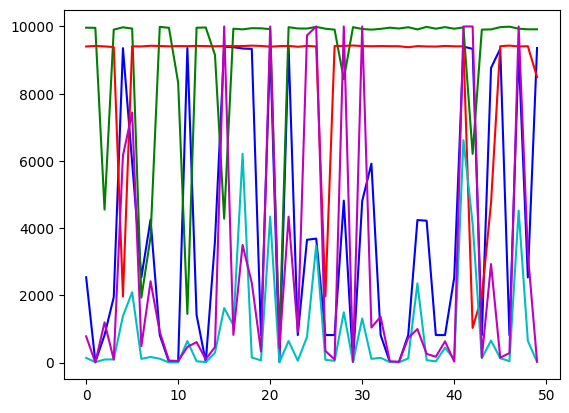

In [ ]:
seed = 1
random.seed(seed)
np.random.seed(seed)
#['b','g','r','c','m','y','w','k']
#
#
#
compareAlgorithm([GeneticInverseBaseAlgorithm(100,0.1,initializeInversePop,newGenerationInverseMitosis),
                  GeneticBaseAlgorithm(100,0.1,initializePopWithInverse,newGenerationMitosis),
                  MemeticAlgorithmBase(100,0.1,initializePopWithInverse,newGenerationMemeticMitosis),
                  ExhaustiveSearchWithInverse(),
                  RandomSearchWithInverse()],['b','g','r','c','m','y','w','k'],50,goppa2,9,10000)

In [ ]:
def compareAlgorithmByEvaluations(list_algorithm,colors,n_problems,list_goppa_matrix,list_numbererrors,max_evals):
  evaluations_each_algorithm = []
  time_each_algorithm = []
  problems_resolved_each_algorithm = []
  n_alg = len(list_algorithm)
  n_matrix = len(list_goppa_matrix)

  for i in range(n_alg):
    evaluations_each_algorithm.append([])
    time_each_algorithm.append([])
    problems_resolved_each_algorithm.append([])
    for k in range(n_matrix):
      evaluations_each_algorithm[i].append([])
      time_each_algorithm[i].append(0)
      problems_resolved_each_algorithm[i].append(0)

  for k,goppa_matrix in enumerate(list_goppa_matrix):
    for i in range(n_problems):
      problem = Createproblem(goppa_matrix,list_numbererrors[k],max_evals,True)
      for x,alg in enumerate(list_algorithm):
        act_problem = problem.create_new_try_clone()
        start_time = time.time()
        alg.solve(act_problem)
        end_time = time.time()
        evaluations_each_algorithm[x][k].append(act_problem.n_evals)
        time_each_algorithm[x][k] += end_time-start_time
        if(act_problem.best_fitness <= act_problem.numbererrors):
          problems_resolved_each_algorithm[x][k] +=1

  for i in range(n_alg):
    evals = []
    for k in range(n_matrix):
      evals.append(sum(evaluations_each_algorithm[i][k]))
    evaluations_each_algorithm[i] = evals


  print(problems_resolved_each_algorithm)
  problems_range = np.arange(0,n_matrix)
  for i in range(n_alg):
    plt.plot(problems_range,evaluations_each_algorithm[i],colors[i])
    print("In ",sum(time_each_algorithm[i])," seconds ",sum(problems_resolved_each_algorithm[i])," problems have been solved by ",list_algorithm[i].name,i)
    #print("The algoritm ",list_algorithm[i].name,i," has taken ",time_each_algorithm[i]," seconds and have solved ",problems_resolved_each_algorithm[i]," problems")

  plt.xlabel('Tamaño de la matriz')
  plt.ylabel('Tiempo(s)')

  plt.title("Problema de decodificación de un código lineal")
  plt.legend(list(list_algorithm[i].name for i in range(n_alg)),loc='upper left')

  plt.show()

In [ ]:
def compareAlgorithmByTime(list_algorithm,colors,n_problems,list_goppa_matrix,list_numbererrors,max_evals):
  evaluations_each_algorithm = []
  time_each_algorithm = []
  problems_resolved_each_algorithm = []
  n_alg = len(list_algorithm)
  n_matrix = len(list_goppa_matrix)

  for i in range(n_alg):
    evaluations_each_algorithm.append([])
    time_each_algorithm.append([])
    problems_resolved_each_algorithm.append([])
    for k in range(n_matrix):
      evaluations_each_algorithm[i].append([])
      time_each_algorithm[i].append(0)
      problems_resolved_each_algorithm[i].append(0)

  for k,goppa_matrix in enumerate(list_goppa_matrix):
    for i in range(n_problems):
      problem = Createproblem(goppa_matrix,list_numbererrors[k],max_evals,True)
      for x,alg in enumerate(list_algorithm):
        act_problem = problem.create_new_try_clone()
        start_time = time.time()
        alg.solve(act_problem)
        end_time = time.time()
        evaluations_each_algorithm[x][k].append(act_problem.n_evals)
        time_each_algorithm[x][k] += end_time-start_time
        if(act_problem.best_fitness <= act_problem.numbererrors):
          problems_resolved_each_algorithm[x][k] +=1

  for i in range(n_alg):
    evals = []
    for k in range(n_matrix):
      evals.append(sum(evaluations_each_algorithm[i][k]))
    evaluations_each_algorithm[i] = evals


  print(problems_resolved_each_algorithm)
  problems_range = np.arange(1,n_matrix+1)

  f = plt.figure(1)
  for i in range(n_alg):
    plt.plot(problems_range,evaluations_each_algorithm[i],colors[i])
    print("In ",sum(evaluations_each_algorithm[i])," evaluations ",sum(problems_resolved_each_algorithm[i])," problems have been solved by ",list_algorithm[i].name,i)
    #print("The algoritm ",list_algorithm[i].name,i," has taken ",time_each_algorithm[i]," seconds and have solved ",problems_resolved_each_algorithm[i]," problems")


  plt.xlabel('Tamaño de la matriz')
  plt.ylabel('Evaluaciones')

  plt.title("Problema de decodificación de un código lineal")
  plt.legend(list(list_algorithm[i].name for i in range(n_alg)),loc='upper left')

  #f.show()

  g = plt.figure(2)
  for i in range(n_alg):
    plt.plot(problems_range,time_each_algorithm[i],colors[i])
    print("In ",sum(time_each_algorithm[i])," seconds ",sum(problems_resolved_each_algorithm[i])," problems have been solved by ",list_algorithm[i].name,i)
    #print("The algoritm ",list_algorithm[i].name,i," has taken ",time_each_algorithm[i]," seconds and have solved ",problems_resolved_each_algorithm[i]," problems")


  plt.xlabel('Tamaño de la matriz')
  plt.ylabel('Tiempo(s)')

  plt.title("Problema de decodificación de un código lineal")
  plt.legend(list(list_algorithm[i].name for i in range(n_alg)),loc='upper left')

  #g.show()
  plt.show()

[[5, 5, 5, 5, 5], [5, 5, 5, 5, 5], [5, 5, 5, 5, 5], [5, 5, 5, 5, 5], [5, 5, 5, 5, 5]]
In  111971  evaluations  25  problems have been solved by  Algoritmo Genético Con Inversa 0
In  619257  evaluations  25  problems have been solved by  Algoritmo Genético Directo 1
In  624698  evaluations  25  problems have been solved by  Algoritmo Memético 2
In  11167  evaluations  25  problems have been solved by  Algoritmo Búsqueda Exhaustiva Con Inversa 3
In  606264  evaluations  25  problems have been solved by  Algoritmo Búsqueda Local Aleatoria 4
In  74.1371169090271  seconds  25  problems have been solved by  Algoritmo Genético Con Inversa 0
In  24.906665802001953  seconds  25  problems have been solved by  Algoritmo Genético Directo 1
In  10.92148733139038  seconds  25  problems have been solved by  Algoritmo Memético 2
In  0.47149038314819336  seconds  25  problems have been solved by  Algoritmo Búsqueda Exhaustiva Con Inversa 3
In  10.220919370651245  seconds  25  problems have been solved 

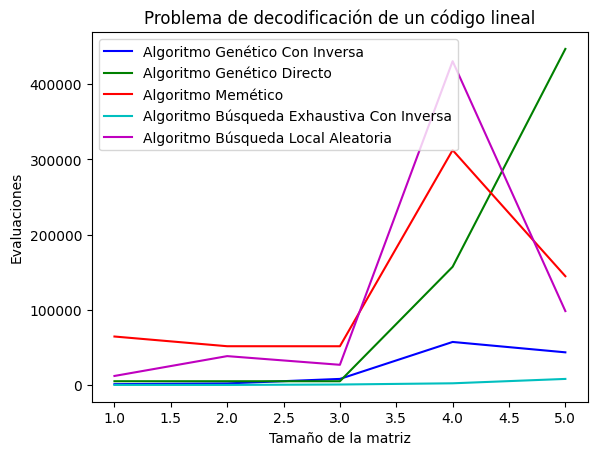

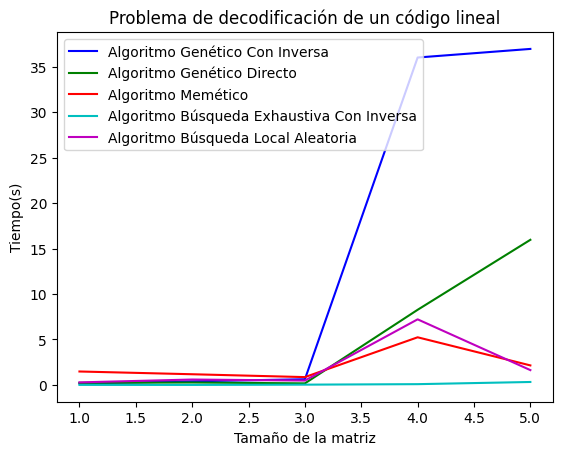

In [ ]:
seed = 6
random.seed(seed)
np.random.seed(seed)
#['b','g','r','c','m','y','w','k']
#
#
#
compareAlgorithmByTime([GeneticInverseBaseAlgorithm(1000,0.1,initializeInversePop,newGenerationInverseMitosis),
                  GeneticBaseAlgorithm(1000,0.1,initializePopWithInverse,newGenerationMitosis),
                  MemeticAlgorithmBase(1000,0.1,initializePopWithInverse,newGenerationMemeticMitosis),
                  ExhaustiveSearchWithInverse(),
                  LocalRandomSearchAlgorithm()],['b','g','r','c','m','y','w','k'],5,[goppa5,goppa4,goppa4,goppa2,goppa2],[2,3,3,9,9],500000)

[[5, 5, 5, 5, 5], [5, 5, 5, 5, 5], [5, 5, 5, 5, 5]]
In  828042  evaluations  25  problems have been solved by  Algoritmo Genético Directo 0
In  1071992  evaluations  25  problems have been solved by  Algoritmo Memético 1
In  743702  evaluations  25  problems have been solved by  Algoritmo Búsqueda Local Aleatoria 2
In  30.610267639160156  seconds  25  problems have been solved by  Algoritmo Genético Directo 0
In  16.037797927856445  seconds  25  problems have been solved by  Algoritmo Memético 1
In  11.484921216964722  seconds  25  problems have been solved by  Algoritmo Búsqueda Local Aleatoria 2


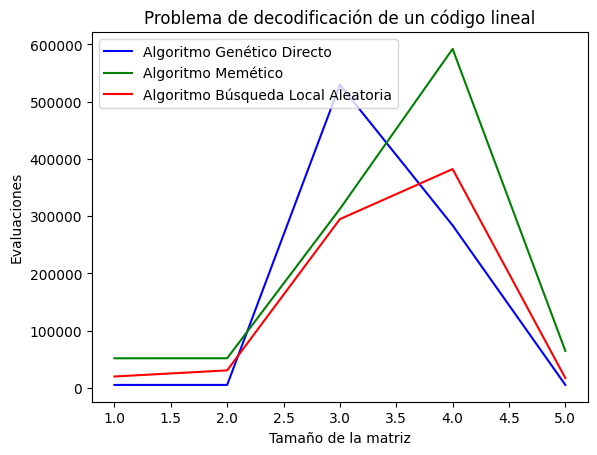

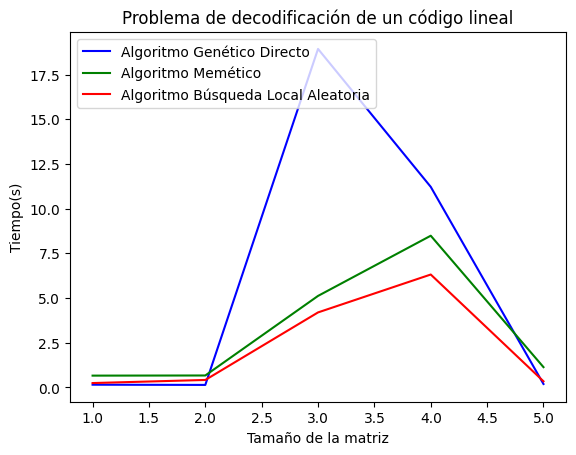

In [ ]:
seed = 8
random.seed(seed)
np.random.seed(seed)
#['b','g','r','c','m','y','w','k']
#
#
#
compareAlgorithmByTime([GeneticBaseAlgorithm(1000,0.1,initializePopWithInverse,newGenerationMitosis),
                  MemeticAlgorithmBase(1000,0.1,initializePopWithInverse,newGenerationMemeticMitosis),
                  LocalRandomSearchAlgorithm()],['b','g','r','c','m','y','w','k'],5,[goppa4,goppa4,goppa2,goppa2,goppa5],[3,3,9,9,2],500000)

[[9, 9, 9], [10, 10, 10], [10, 10, 10]]
In  3024237  evaluations  27  problems have been solved by  Algoritmo Genético Con Inversa 0
In  18848  evaluations  30  problems have been solved by  Algoritmo Búsqueda Exhaustiva Con Inversa 1
In  135760  evaluations  30  problems have been solved by  Random search with the inverse algorithm 2
In  138.06648111343384  seconds  27  problems have been solved by  Algoritmo Genético Con Inversa 0
In  0.6092960834503174  seconds  30  problems have been solved by  Algoritmo Búsqueda Exhaustiva Con Inversa 1
In  5.410725116729736  seconds  30  problems have been solved by  Random search with the inverse algorithm 2


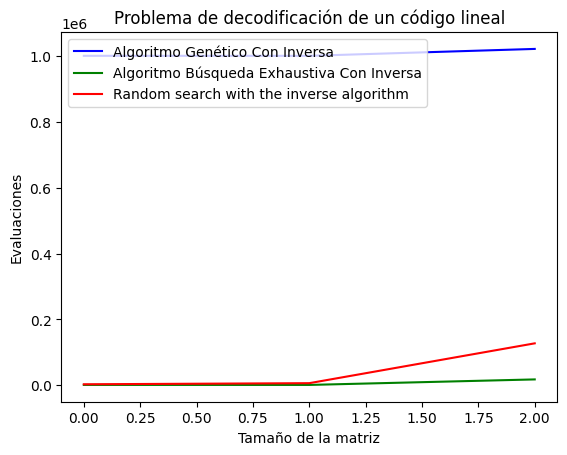

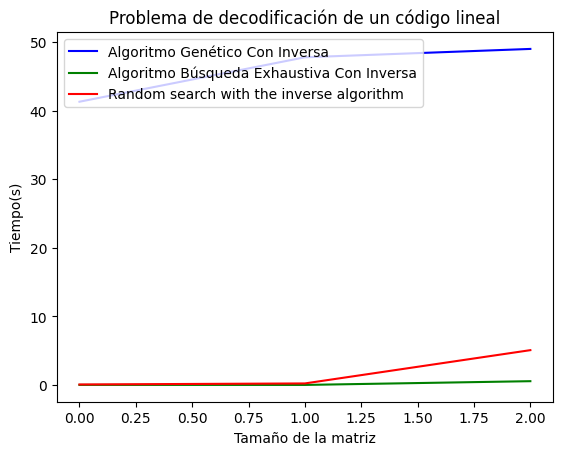

In [ ]:
seed = 5
random.seed(seed)
np.random.seed(seed)
#['b','g','r','c','m','y','w','k']
#
#
#
compareAlgorithmByTime([GeneticInverseBaseAlgorithm(100,0.1,initializeInversePop,newGenerationInverseMitosis),
                  ExhaustiveSearchWithInverse(),
                  RandomSearchWithInverse()],['b','g','r','c','m','y','w','k'],10,[goppa5,goppa4,goppa2],[2,3,9],1000000)

[1]
In  0.1960439682006836  seconds  1  problems have been solved by  Exhaustive search with inverse algorithm 0


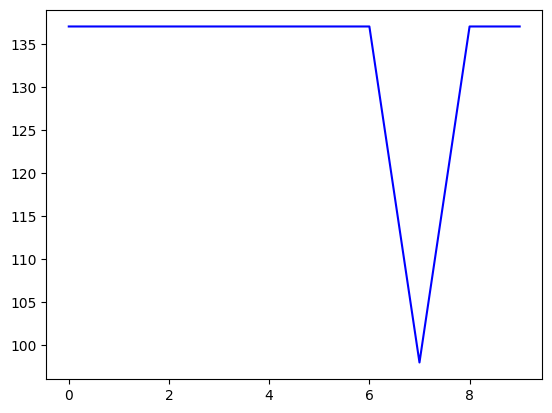

In [ ]:
seed = 1
random.seed(seed)
np.random.seed(seed)
#['b','g','r','c','m','y','w','k']
#GeneticInverseBaseAlgorithm(10,0.05,initializeInversePop,newGenerationInverseMitosis),
#RandomSearchDirect(),
compareAlgorithmByTime([ExhaustiveSearchWithInverse()],['b','g','r','c','m','y','w','k'],10,goppa4,2,5000000)

[10, 10, 10, 10]
In  4.536290168762207  seconds  10  problems have been solved by  Genetic algorithm 0
In  2.5637776851654053  seconds  10  problems have been solved by  Genetic algorithm 1
In  3.8499324321746826  seconds  10  problems have been solved by  Genetic algorithm 2
In  1.395280122756958  seconds  10  problems have been solved by  Genetic algorithm 3


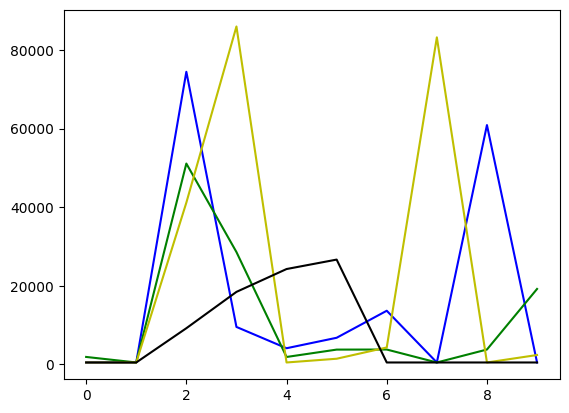

In [ ]:
seed = 2
random.seed(seed)
np.random.seed(seed)
compareAlgorithm([GeneticBaseAlgorithm(500,0.10,initializePopWithInverse,newGenerationMitosis),
                  GeneticBaseAlgorithm(500,0.12,initializePopWithInverse,newGenerationMitosis),
                  GeneticBaseAlgorithm(500,0.14,initializePopWithInverse,newGenerationMitosis),
                  GeneticBaseAlgorithm(500,0.16,initializePopWithInverse,newGenerationMitosis)],['b','g','y','k'],10,goppa4,4,100000)

## Visualizando loss function

In [ ]:
def trylossfunction(n_problems,goppa_matrix,numbererrors):
  mean_fitness_vector = []
  for p in range(n_problems):
    mean_fitness_per_batch = []
    """
    [public_key,private_key] = generateCriptoSistem(len_vector,initial_range)
    obj_sol = np.array([random.randint(0,1) for i in range(len_vector)])
    obj_sum = np.dot(obj_sol,public_key)
    problem = Problem(public_key,obj_sum,2**(len_vector+100))
    """
    problem = Createproblem(goppa_matrix,numbererrors,2**(goppa_matrix.shape[0]+100))
    for i in range(0,goppa_matrix.shape[0]):
      actual_fitness = []
      for x in range(100):
        pos = random.choices(range(goppa_matrix.shape[0]),k=i)
        actual_sol = problem.messageoriginal
        for y in pos:
          actual_sol[y] = (actual_sol[y] + 1) % 2
        actualeval = problem.hamming_distance_to_coded(actual_sol)
        actual_fitness.append(actualeval)
      #print(actual_fitness)
      mean_fitness_per_batch.append(sum(actual_fitness)/len(actual_fitness))
    mean_fitness_vector.append(mean_fitness_per_batch)

  final_vector = []
  for x in range(goppa_matrix.shape[0]):
    actualsum = 0
    for y in range(n_problems):
      actualsum += mean_fitness_vector[y][x]
    final_vector.append(actualsum/n_problems)

  plt.plot(final_vector)

  plt.xlabel('Distancia de Hamming')
  plt.ylabel('Función objetivo')

  plt.title("Comparación de la función de perdida directa")
  plt.show()

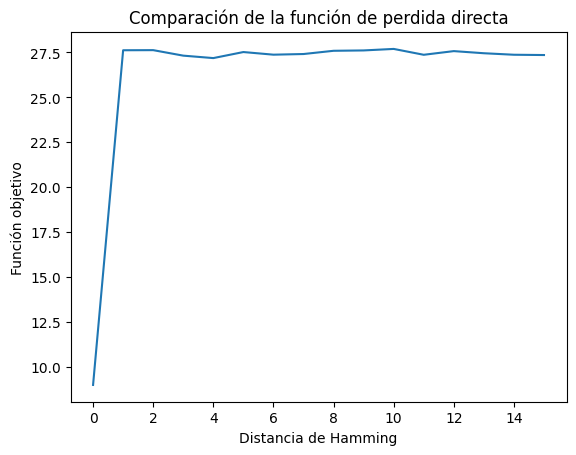

In [ ]:
trylossfunction(5,goppa2,9)

In [ ]:
def trylossfunctioninverse(n_problems,goppa_matrix,numbererrors):
  mean_fitness_vector = []
  for p in range(n_problems):
    mean_fitness_per_batch = []
    """
    [public_key,private_key] = generateCriptoSistem(len_vector,initial_range)
    obj_sol = np.array([random.randint(0,1) for i in range(len_vector)])
    obj_sum = np.dot(obj_sol,public_key)
    problem = Problem(public_key,obj_sum,2**(len_vector+100))
    """
    problem = Createproblem(goppa_matrix,numbererrors,2**(goppa_matrix.shape[0]+100))
    inverse_matrix = inverse_rectangular_binary(problem.matrix)
    for i in range(0,goppa_matrix.shape[0]):
      actual_fitness = []
      for x in range(1000):
        pos = random.choices(range(goppa_matrix.shape[0]),k=i)
        actual_sol = problem.messagecoded
        for y in pos:
          actual_sol[y] = (actual_sol[y] + 1) % 2
        actual_sol = (actual_sol @ inverse_matrix)%2
        actualeval = problem.hamming_distance_to_coded(actual_sol)
        actual_fitness.append(actualeval)
      #print(actual_fitness)
      mean_fitness_per_batch.append(sum(actual_fitness)/len(actual_fitness))
    mean_fitness_vector.append(mean_fitness_per_batch)

  final_vector = []
  for x in range(goppa_matrix.shape[0]):
    actualsum = 0
    for y in range(n_problems):
      actualsum += mean_fitness_vector[y][x]
    final_vector.append(actualsum/n_problems)

  plt.plot(final_vector)

  plt.xlabel('Distancia de Hamming')
  plt.ylabel('Función objetivo')

  plt.title("Comparación de la función de perdida con la inversa")
  plt.show()

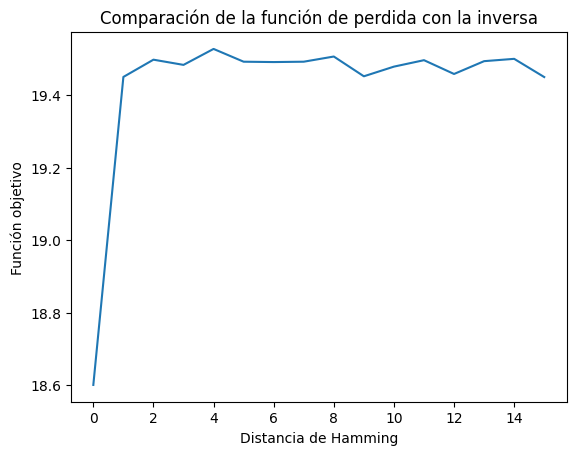

In [ ]:
trylossfunctioninverse(10,goppa2,9)